## "Target Profile of Minecraft Players Who Contribute the Most Data"

#### Group Members: Ella Bailey, Jayden Chen, Peter Wojnicki, Vanshika Dixit
### Introduction:

A research group in the Department of Computer Science at UBC is studying how
people interact within a virtual environment. To collect data, researchers were able to gather a
wide variety of people and put them all into a Minecraft server in order to document their
actions. Data that was collected from this experiment included the players name, age, skill level,
gender, forum subscription status, hours played and previous experience in the game.
Additionally, researchers were also able to collect exact dates and time players logged into and
off the Minecraft server. The goal of this research server is to help identify various patterns of
engagement between the type of players and the hours spent in the game.

Although there are many ways to interpret and analyze patterns in the data, we have
chosen to target the question of: Which types of players are most likely to contribute to
large amounts of data on the Minecraft research server? More specifically, we aim to
examine whether certain player characteristics like age, total hours played, and typical session
lengths are associated with higher levels of activity inside of the Minecraft server.
Understanding the demographic of people who contribute the most with data collection helps us
better understand the traits, like age ranges, that could be strongly correlated with higher
engagement.

To address this question we used the players.csv and sessions.csv dataset to see the
demographic and behavior related to overall activity levels. The player.csv dataset, contains a
total of 196 observations and seven different variables documenting the players age, gender,
experience level, hours played and subscription status. The sessions.csv file contains 1535
observations and five variables that describe the start and end times of each gameplay session,
including timestamps. Using these two files together lets us see both who the players are and
how long they actually spent playing, which lets us figure out the type of plays which contribute
the most to the data.

### Methods & Results:

Before reading in the data, we first loaded in several libraries, including tidyverse, tidymodels, and tidyclust, which include several packages for manipulation, visualization, and clustering of data, as well as repr to create string representations of objects, and GGally and cowplot to improve functionality of ggplot2. We also used options() to set the maximum displayed rows to six for a more efficient workspace.

The data in the original players.csv and sessions.csv files were already pretty tidy and didn’t need much work to make them more legible. We made them more efficient by combining the sessions data into the player information using left_join(), creating a new dataset called sessions_players_elapsed. In addition, a new column called session_time is added to show elapsed time in minutes of each session, where times are converted from strings to more usable data. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant.

<center><b>Table 1.</b> Overview of Data with Number of Columns and Observations</center>

| Source File Name | Number of Columns | Total Number of Observations |
|:-:|:-:|:-:|
|players.csv| 7 | 196 |
|sessions.csv| 5 | 1535 | 


<center><b>Table 2.</b> Summary statistics for variables of interest</center>

| Variable Name | Mean | Median | Minimum | Maximum | Number of Observations |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Player Age (years) | 21.14 | 19 | 9 | 58 | 196 |
|Played Hours (hours) | 5.85 | 0.1 | 0 | 223.1 | 196 |
|Elapsed Session Time (minutes) | 50.86 | 30 | 3 | 259 | 1535 |
|Start Date (Month Day)| June 24 | June 24 | April 06 | Sept 26 | 1535 |
|End Date (Month Day)| June 24 | June 23 | April 06 | Sept 26 | 1535 |

#### Preliminary Visualizations
Before starting any visualizations, we first set options(repr.plot.width = 7, repr.plot.height = 7) for consistent plot projection in the Jupyter notebook.
Our first visualization is a scatterplot of age and total hours played, where x = Age and y = played_hours, scaled on the y axis by log10. The plot is scaled due to the very wide and sparse distribution of total hours played; scaling the data condenses it so we can more easily visualize trends.  The plot has a very slightly negative association, with only one observation out of seven over 35 years old which had more than one hour of play time. The vast majority of observations were under 30 years old, and most had under 10 hours of playtime.
The second visualization was a scatterplot of age and session time, not dissimilar from the previous plot. This time, we took the new session_time variable from the sessions_players_elapsed dataset, setting x = Age and y = session_time_elapsed (in minutes). There’s no need to scale this plot, as the distribution isn’t as large. Like the previous visualization, this one has a slightly negative association with the majority of observations below 30 years old and below 100 minutes session time.
Next is a bar graph of experience and total hours played, using gender as fill. Experience is divided into five categories: amateur, beginner, pro, regular, and veteran. The vast majority of total hours played is within the Regular and Amateur categories. Gender distribution isn’t very consistent between categories, with the Regular category divided fairly evenly between female and male players, while the Amateur category is divided between male, female, and non-binary players. Beginner and Pro are dominated by male players, and Veteran is split between agender and other genders.
Next, we have a ggpairs matrix of played_hours, Age, and session_time_elapsed, with alpha set to 0.05 for better visualization of overlapping aspects.
Next is a histogram of session start times, where x = start_times and y is a count. Here, we first isolate the time of day, ignoring the dates in the start_times variable. We mutate the column with as.POSIXct() to format the date and time, and alter use scale_x_datetime(date_labels = “%H:%M”) to indicate hour:minute time, and date_breaks = “1 hour”) to determine bin size. This histogram ends up being very distinctly bimodal, with no sessions starting at 12:00. There are peaks around 04:00 and 23:00.
Our last initial visualization is a scatterplot of start times and session lengths, utilizing the same time format as the last. Similarly here, there are very few start times around noon, and peaks around 03:00 and 23:00.

#### kNN Means Clustering
With kNN clustering, we started with y = total hours played and x = age. After setting the seed for consistent reproduction and plot size, we tuned the kNN model to find the best value of K. We used recipe() to log-transform the played_hours variable to base10, and to normalize standard deviation to one and mean to zero for all variables. We set up an elbow plot to identify where accuracy plateaus in order to determine how many clusters are in the dataset. We use this to then cluster with the optimal K value.
We repeat a similar process with y = session_time_elapsed and x = age.
We did a similar clustering process with Age, avg_session_hours, and played_hours, using y = density and x = value.

#### kNN Classification for Experience
We find that regular and amateur players have the largest total hours played so we wanted to predict experience based on age and total played hours. Used 3-fold cross validation with 3 repeats to optimize for a k of 4. The accuracy appeared the be low and a confusion matrix was created.

<center><b>Table 3.</b> Confusion Matrix for kNN Classification </center>

| Prediction/Truth | Pro | Veteran | Amateur | Regular |Beginner|
|:-:|:-:|:-:|:-:|:-:|:-:|
 | Pro       | 0 |      0    |   1    |   0   |     0|
  |Veteran   | 0 |      0   |    2 |      3   |     1|
  |Amateur  |  0 |      6  |     4  |     0  |      3|
  |Regular |   1  |     3  |     5 |      1 |       2|
  |Beginner|   1 |      1|       2  |     2 |       2|

#### Bootstrapping and Inference for the Mean with 99% Confidence Interval
In order to approximate the sampling distribution, we used the bootstrap method. We took the age variable and pulled random samples, sampling with replacement from the original sample so as to mimic what other samples of the population might look like. With the bootstrap distribution plotted, we then used the quantile() function to identify the upper and lower bounds of the sample data.

<center><b>Table 4.</b> Bootstrapping Point Estimates</center>

| Variable Name | Mean | Lower 99% CI | Upper 99% CI |
|:-:|:-:|:-:|:-:|
|Player Age (years) | 21.14 | 19.82 | 22.63 | 
|Played Hours (hours) | 5.85 | 1.70 | 11.82 | 
|Elapsed Session Time (minutes) | 50.86 | 47.46 | 54.42 | 

#### Linear Regression and kNN Regression
Both regression techniques were used to model total time played using age and average session time. As seen in the ggpairs plot the correlation was weak however we still attempted regression. 
Our linear equation was determined to be:

<p>$played\_hours = 420.89 -33.43 \cdot Age + 27.94 \cdot avg\_session\_mins$ </p> 

with a RMSE on training data of 2337.9 and a RMPSE of 726.5. Our kNN regression model had a k of 1 after tuning using and a RMPSE of 1250.9. 

### Discussion:

Players with the greatest total hours were amateurs and regular players with amateur players being approximately half female and half male while regular players are split equally between females, males, and non-binary players. Clustering between age and total playtime shows three major clusters with one cluster being young and many hours played, another being young and few hours played and then a third cluster of older players with varied playtimes. This trend shows up again average session time and age where two clusters are younger players and with either low or high playtimes and then a third cluster for older individuals. When looking at age, average session time and total playtime, age and average session time drove clustering the most. Bootstrapping with a 99% confidence interval showed that the average age from this data was 21.14 years and a 99% CI of (19.82, 22.64), average session time was 5.84 minutes and a 99% CI of (1.70, 11.82), and an average total playtime of 50.86 hours with a 99% CI of (47.46, 54.42). Linear and kNN regression were performed with respective RMSPEs of 726 and 1251. kNN classification was also done to help classify players by their experience levels.

We did not have specific expectations from the data but we were pleasanlty surprised with finding some unique results from applying our models. We hope that these findings will give Frank Wood's lab insight into which demographics should be targetted most to get the most out of his participants.
  
Frank Wood’s Pacific Laboratory for Artificial Intelligence (PLAI) is a research project that aims to employ generative AI in games like Minecraft. Their goal is to create an advanced embodied AI system that can understand and respond to user speech and act within the virtual environment of the game. Their research relies on thousands of hours of data contributed by participants who play Minecraft. By studying the demographics of existing participants, we can observe who might be more willing to participate, contributing to their recruitment efforts by identifying who their target audience would be.

Some future questions that would assist their goals might include how individuals were recruited to participate or their relationship with the university. You also might be curious about demographic-specific questions, such as what might influence the unique gender distributions among differently experienced individuals? Or, what types of players might contribute the lowest proportion data?

### References
Timbers, T., Campbell, T., & Lee, M. (2022). Data Science: A First Introduction (1st ed.). Chapman & Hall/CRC. https://doi.org/10.1201/9781003080978

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Read the Datasets from URLs

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
players_data
sessions_data

experience subscribe
1   Pro         TRUE    
2   Veteran     TRUE    
3   Veteran    FALSE    
⋮   ⋮          ⋮        
194 Amateur    FALSE    
195 Amateur    FALSE    
196 Pro         TRUE    
    hashedEmail                                                     
1   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
2   f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9
3   b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28
⋮   ⋮                                                               
194 d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb
195 f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436
196 d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11
    played_hours name      gender            Age
1   30.3         Morgan    Male               9 
2    3.8         Christian Male              17 
3    0.0         Blake     Male              17 
⋮   ⋮            ⋮         ⋮                 ⋮  
194 0.0          Dylan     Prefer not to say 57 
195 2.3          Harlow    Male              17 
196 0.2          Ahmed     Other             NA

hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮    ⋮                                                               
1533 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1534 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1535 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
     start_time       end_time         original_start_time original_end_time
1    30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2    17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3    25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
⋮    ⋮                ⋮                ⋮                   ⋮                
1533 28/07/2024 15:36 28/07/2024 15:57 1.72218e+12         1.72218e+12      
1534 25/07/2024 06:15 25/07/2024 06:22 1.72189e+12         1.72189e+12      
1535 20/05/2024 02:26 20/05/2024 02:45 1.71617e+12         1.71617e+12

#### Left Join Data on Hashed Email and Wrangle Time
A new column called session_time is added to show elapsed time of session and times are converted from strings to more usable data. Sessions data is now combined with player information. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant. 

In [4]:
sessions_players_joined <- sessions_data |>
  left_join(players_data, by = "hashedEmail")

sessions_players_elapsed <- sessions_players_joined |>
    mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
           start_time =  as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_time_elapsed = as.numeric(end_time - start_time)) |>
    select(-original_start_time, -original_end_time)

sessions_players_elapsed

hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮    ⋮                                                               
1533 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1534 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1535 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
     start_time          end_time            experience subscribe played_hours
1    2024-06-30 18:12:00 2024-06-30 18:24:00 Regular    TRUE      223.1       
2    2024-06-17 23:33:00 2024-06-17 23:46:00 Amateur    TRUE       53.9       
3    2024-07-25 17:34:00 2024-07-25 17:57:00 Amateur    TRUE      150.0       
⋮    ⋮                   ⋮                   ⋮          ⋮         ⋮           
1533 2024-07-28 15:36:00 2024-07-28 15:57:00 Amateur    TRUE      56.1        
1534 2024-07-25 06:15:00 2024-07-25 06:22:00 Amateur    TRUE      56.1        
1535 2024-05-20 02:26:00 2024-05-20 02:45:00 Amateur    TRUE      53.9        
     name    gender Age session_time_elapsed
1    Hiroshi Male   17  12                  
2    Alex    Male   17  13                  
3    Delara  Female 16  23                  
⋮    ⋮       ⋮      ⋮   ⋮                   
1533 Dana    Male   23  21                  
1534 Dana    Male   23   7                  
1535 Alex    Male   17  19

#### Preliminary Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


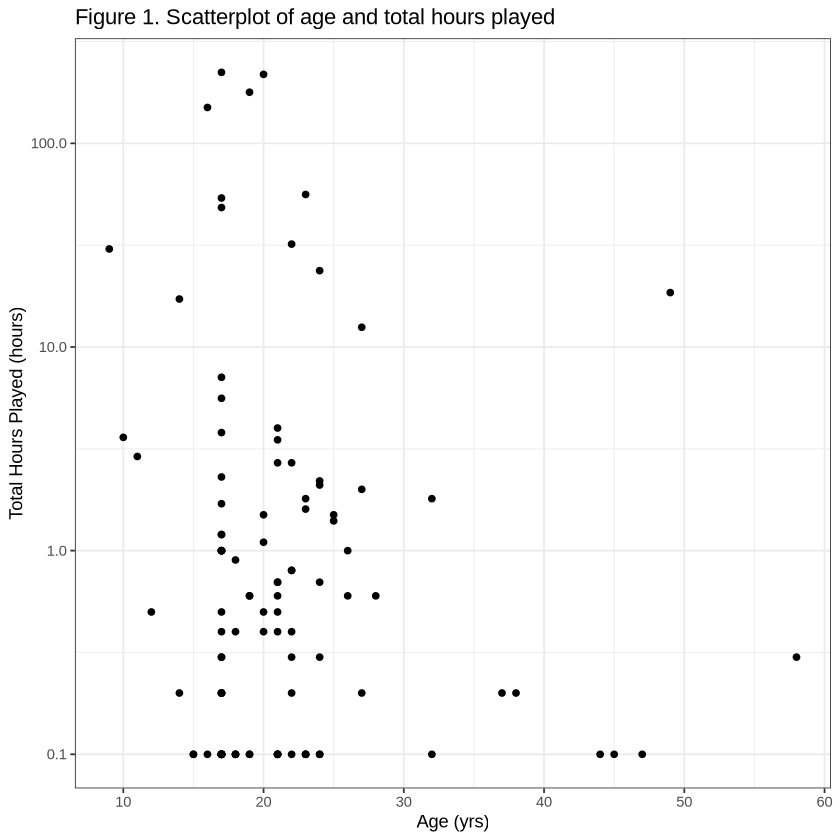

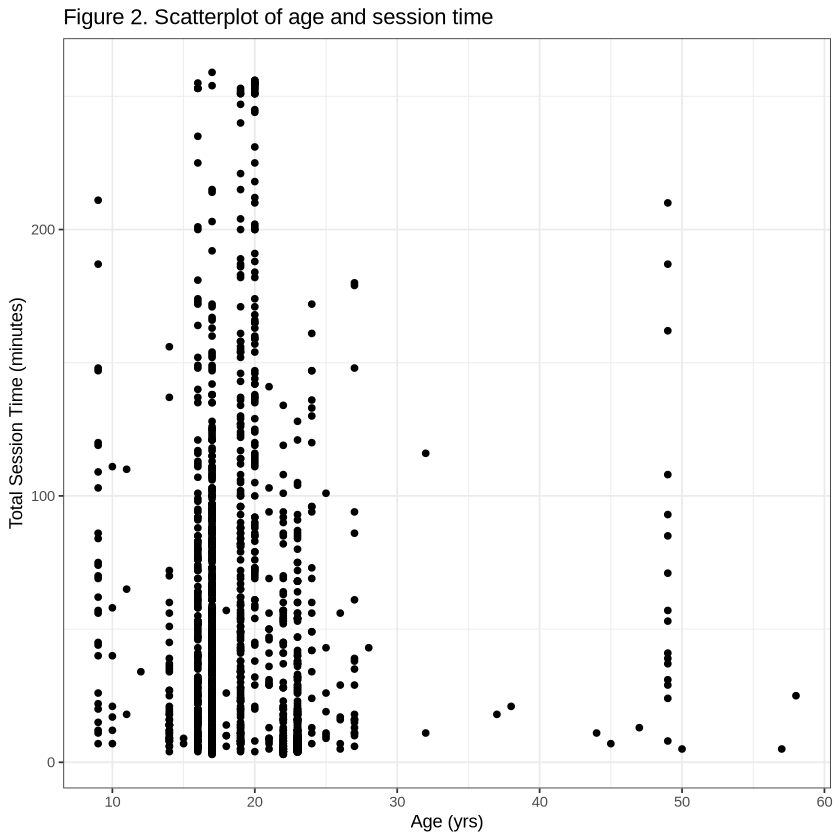

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


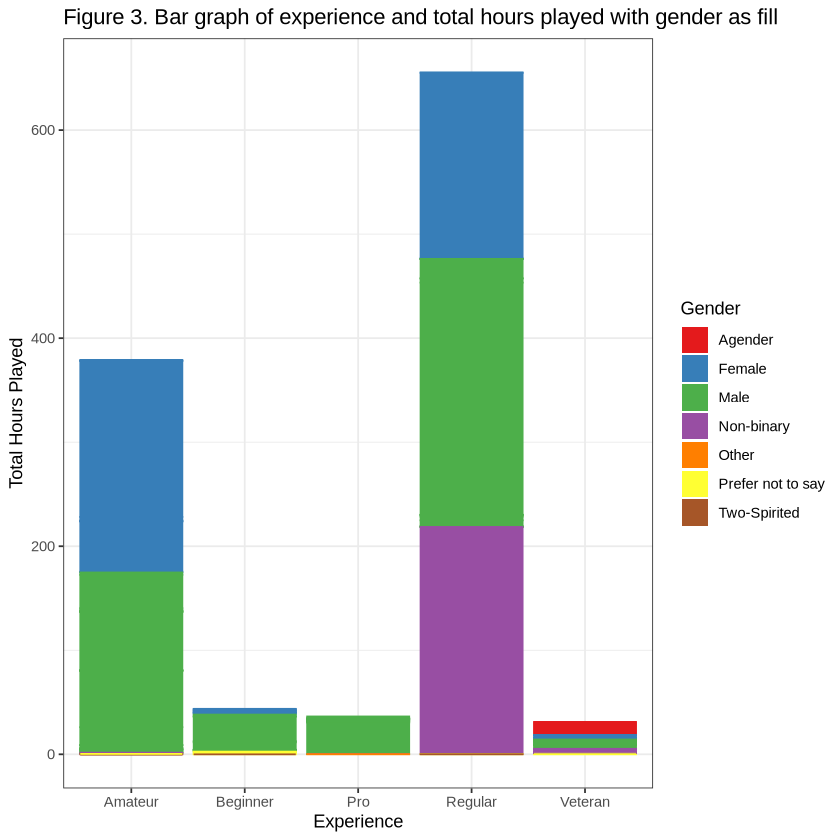

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


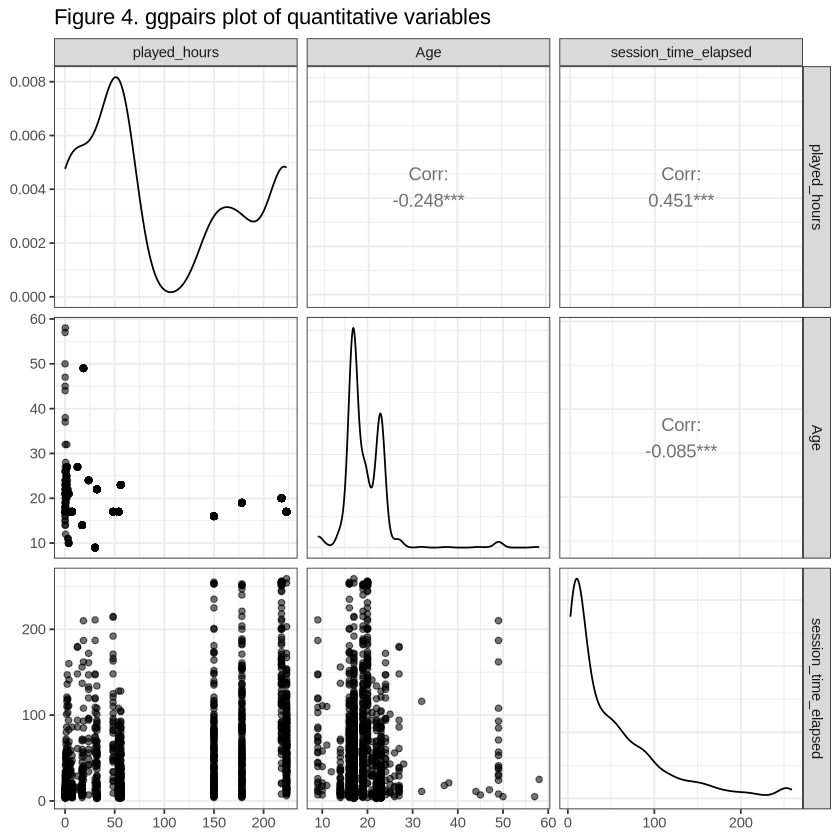

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


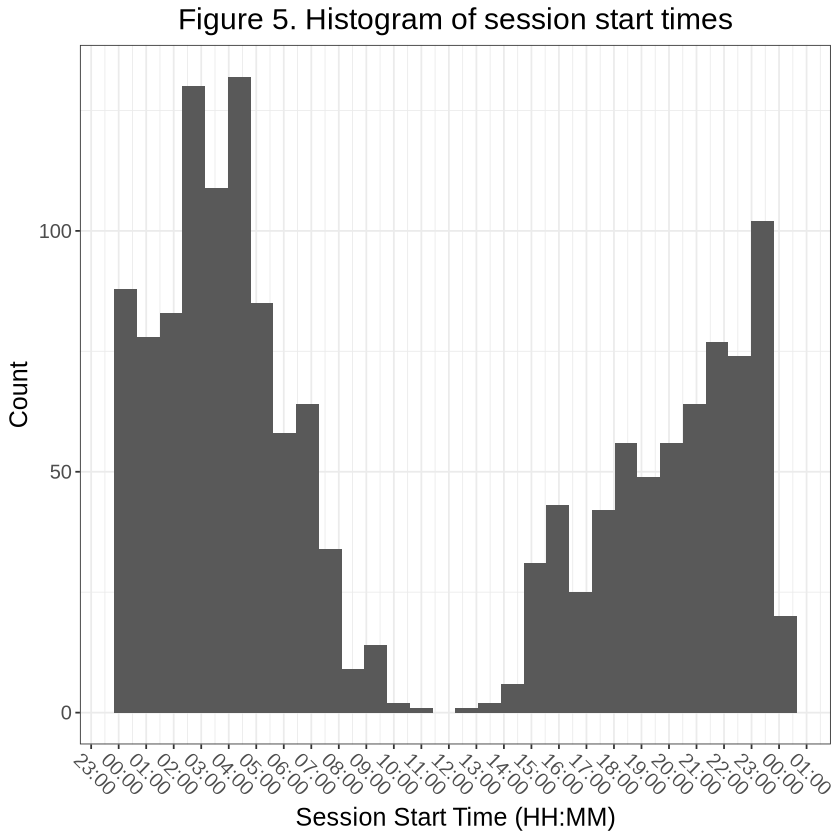

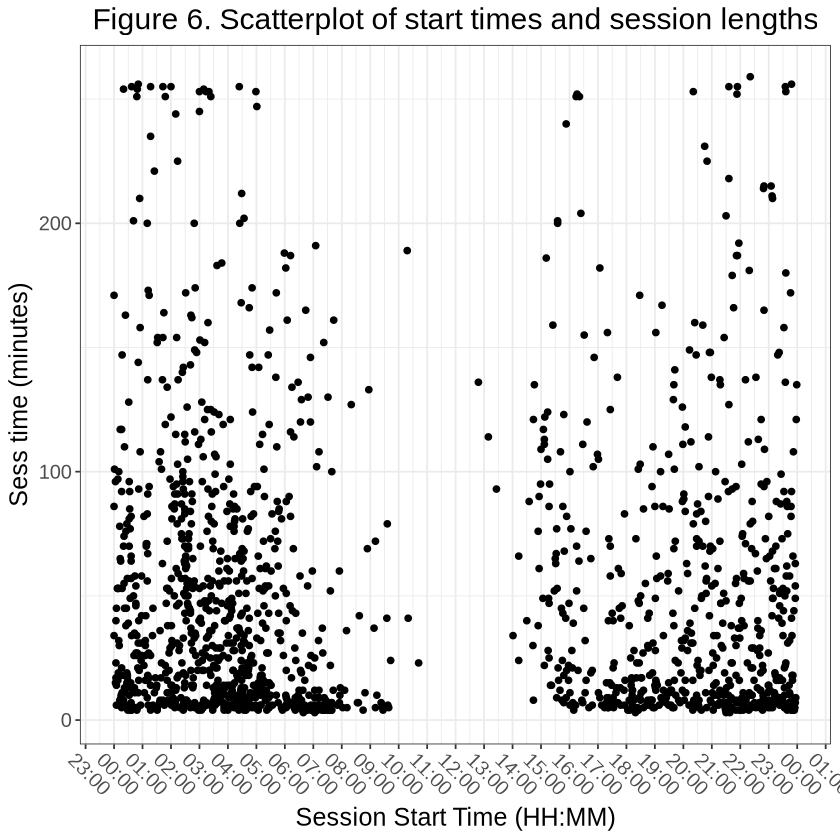

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Scatterplot of age and total hours played
players_data1 <- filter(players_data, played_hours > 0)
age_vs_hours <- ggplot(players_data1, aes(x = Age, y = played_hours)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Hours Played (hours)") +
        scale_y_log10() + theme_bw() + ggtitle("Figure 1. Scatterplot of age and total hours played")
    

# Scatterplot of age and session time
sessions_players_elapsed1 <- filter(sessions_players_elapsed, session_time_elapsed > 0)
age_vs_sesstime <- ggplot(sessions_players_elapsed1, aes(x = Age, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Session Time (minutes)") + theme_bw() +
    ggtitle("Figure 2. Scatterplot of age and session time")

# Bar graph of experience and total hours played with gender as fill
players_data_col <- select(players_data, experience, played_hours, gender)
experience_playtime <- ggplot(players_data_col, aes(x = experience, 
                                                y = played_hours,
                                                color = gender,
                                                fill = gender)) +
        geom_col() +
        labs(x = "Experience",
             y = "Total Hours Played",
             fill = "Gender") +
        scale_fill_brewer(palette = "Set1") +
        scale_color_brewer(palette = "Set1") +
        guides(color = "none") + theme_bw() + ggtitle("Figure 3. Bar graph of experience and total hours played with gender as fill")

# ggpairs plot of quantitative variables
player_pairs <- sessions_players_elapsed |> select(played_hours, Age, session_time_elapsed) |>
    ggpairs(aes(alpha = 0.05)) +
    theme(text = element_text(size = 20)) + theme_bw() +
    ggtitle("Figure 4. ggpairs plot of quantitative variables")

# Isolate the times when playing starts and ignore dates
starting_times <- sessions_players_elapsed |>
    mutate(start_times = as.POSIXct(format(start_time, "%H:%M"),
      format = "%H:%M", tz = "UTC"),
          feature_sin = sin(2 * pi * hour(start_times) / 24),
feature_cos = cos(2 * pi * hour(start_times) / 24))

# Histogram of session start times
session_time_plot2 <- starting_times |> 
    ggplot(aes(x = start_times)) +
    geom_histogram() +
    labs(x = "Session Start Time (HH:MM)",
        y = "Count") +
    scale_x_datetime(date_labels = "%H:%M",
                    date_breaks = "1 hour") +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1)) + ggtitle("Figure 5. Histogram of session start times")

# Scatterplot of start times and session lengths
start_vs_sesslen <- ggplot(starting_times, aes(x = start_times, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Session Start Time (HH:MM)",
             y = "Sess time (minutes)") +
        scale_x_datetime(date_labels = "%H:%M",
                         date_breaks = "1 hour") + theme_bw() +
theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1)) +
    ggtitle("Figure 6. Scatterplot of start times and session lengths")


age_vs_hours
age_vs_sesstime
experience_playtime
player_pairs
session_time_plot2
start_vs_sesslen

#### kNN Means Clustering for Total Hours Played

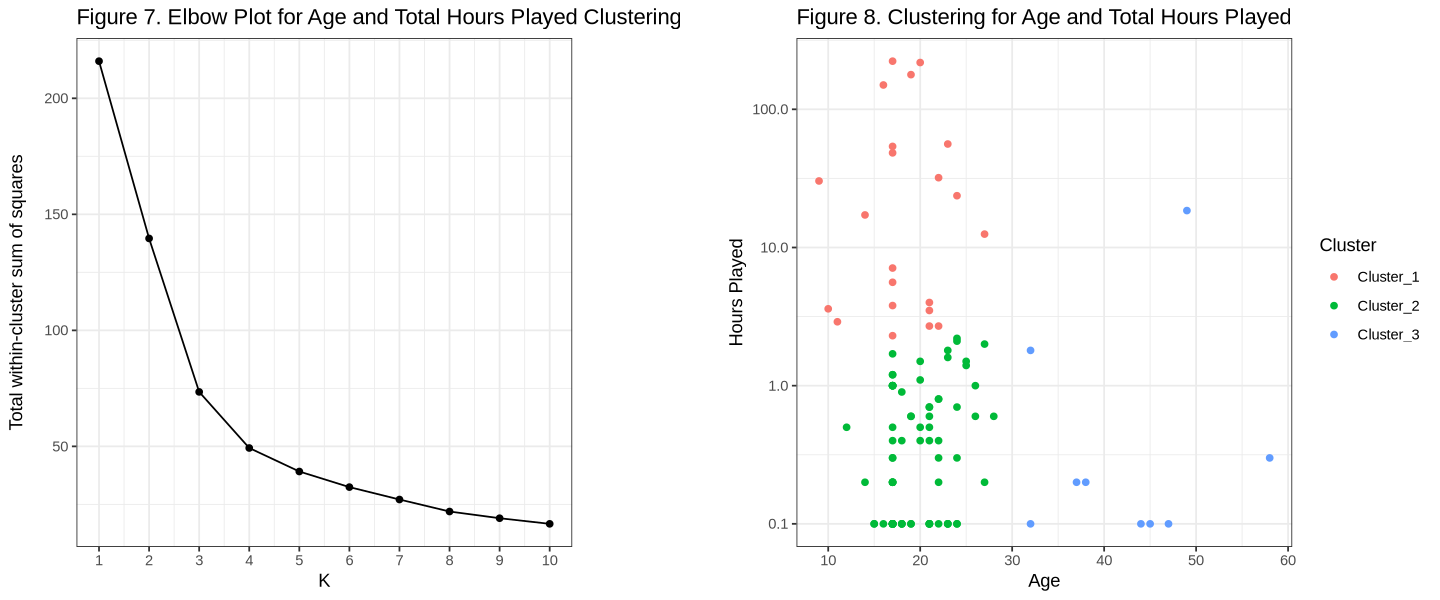

In [6]:
# Set seed for consistent reproduction 
set.seed(888)

# Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
total_played_clustdata <- players_data |> 
    select(Age, played_hours) |> 
    filter(played_hours > 0) |>
    filter(!is.na(Age))

total_played_recipe <- recipe(~ ., total_played_clustdata) |>
    step_log(played_hours, base = 10) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

player_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(player_spec_nstart) |>
    tune_cluster(resamples = apparent(total_played_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot <- elbow_stats |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
total_played_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

total_played_clustering <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(total_played_spec) |>
    fit(data = total_played_clustdata)

clustered_players <- augment(total_played_clustering, total_played_clustdata)

clustering_plot <- clustered_players |>
    ggplot(aes(x = Age, y = played_hours, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Hours Played",
        color = "Cluster") +
    scale_y_log10()

plot_grid(elbow_plot + theme_bw() + ggtitle("Figure 7. Elbow Plot for Age and Total Hours Played Clustering"), 
          clustering_plot + theme_bw() + ggtitle("Figure 8. Clustering for Age and Total Hours Played"), align = "hv") 

#### kNN Means Clustering for Session Times

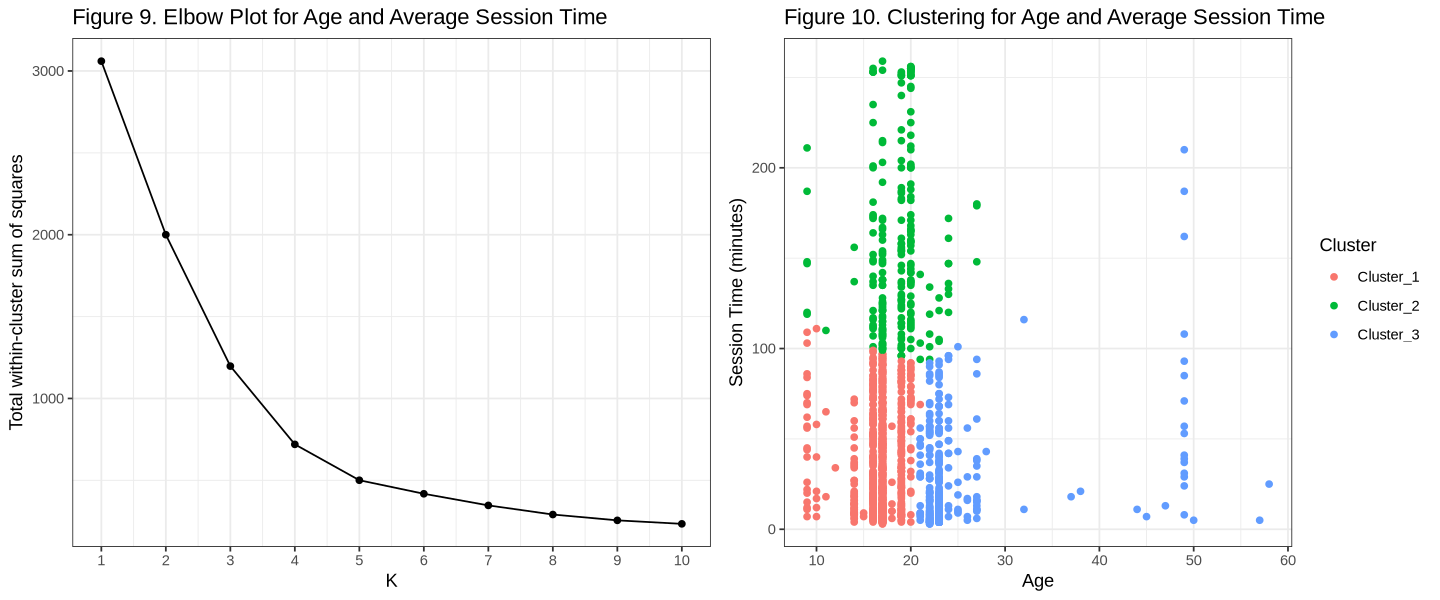

In [7]:
# Set seed for consistent reproduction 
set.seed(888)

# Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
sess_clustdata <- sessions_players_elapsed |> 
    select(Age, session_time_elapsed) |>
     filter(!is.na(Age), !is.na(session_time_elapsed))

sess_recipe <- recipe(~ ., sess_clustdata) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

sess_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_sess <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec_nstart) |>
    tune_cluster(resamples = apparent(sess_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_sess <- elbow_stats_sess |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
sess_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

sess_clustering <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec) |>
    fit(data = sess_clustdata)

clustered_sess <- augment(sess_clustering, sess_clustdata)

clustering_plot_sess <- clustered_sess |>
    ggplot(aes(x = Age, y = session_time_elapsed, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Session Time (minutes)",
        color = "Cluster")


plot_grid(elbow_plot_sess + theme_bw() + ggtitle("Figure 9. Elbow Plot for Age and Average Session Time"), 
          clustering_plot_sess + theme_bw() + ggtitle("Figure 10. Clustering for Age and Average Session Time"))

#### Clustering for Age, Session Time and Total Play Time

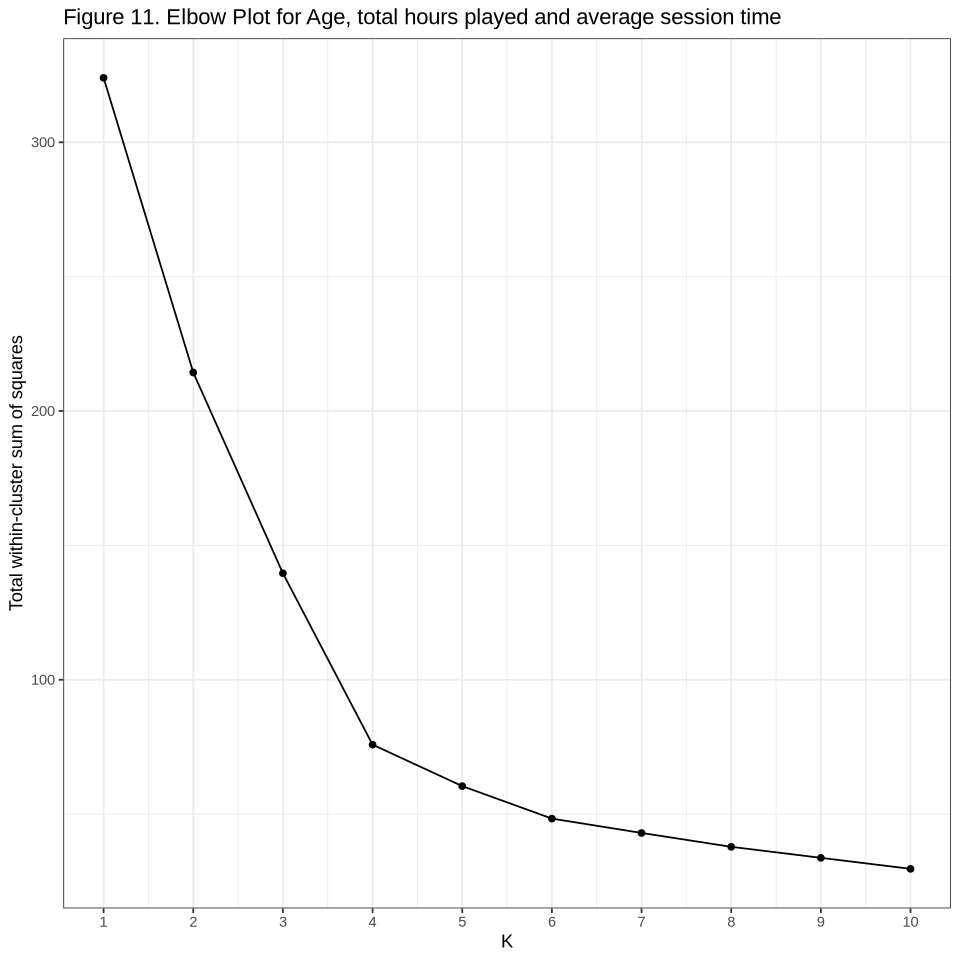

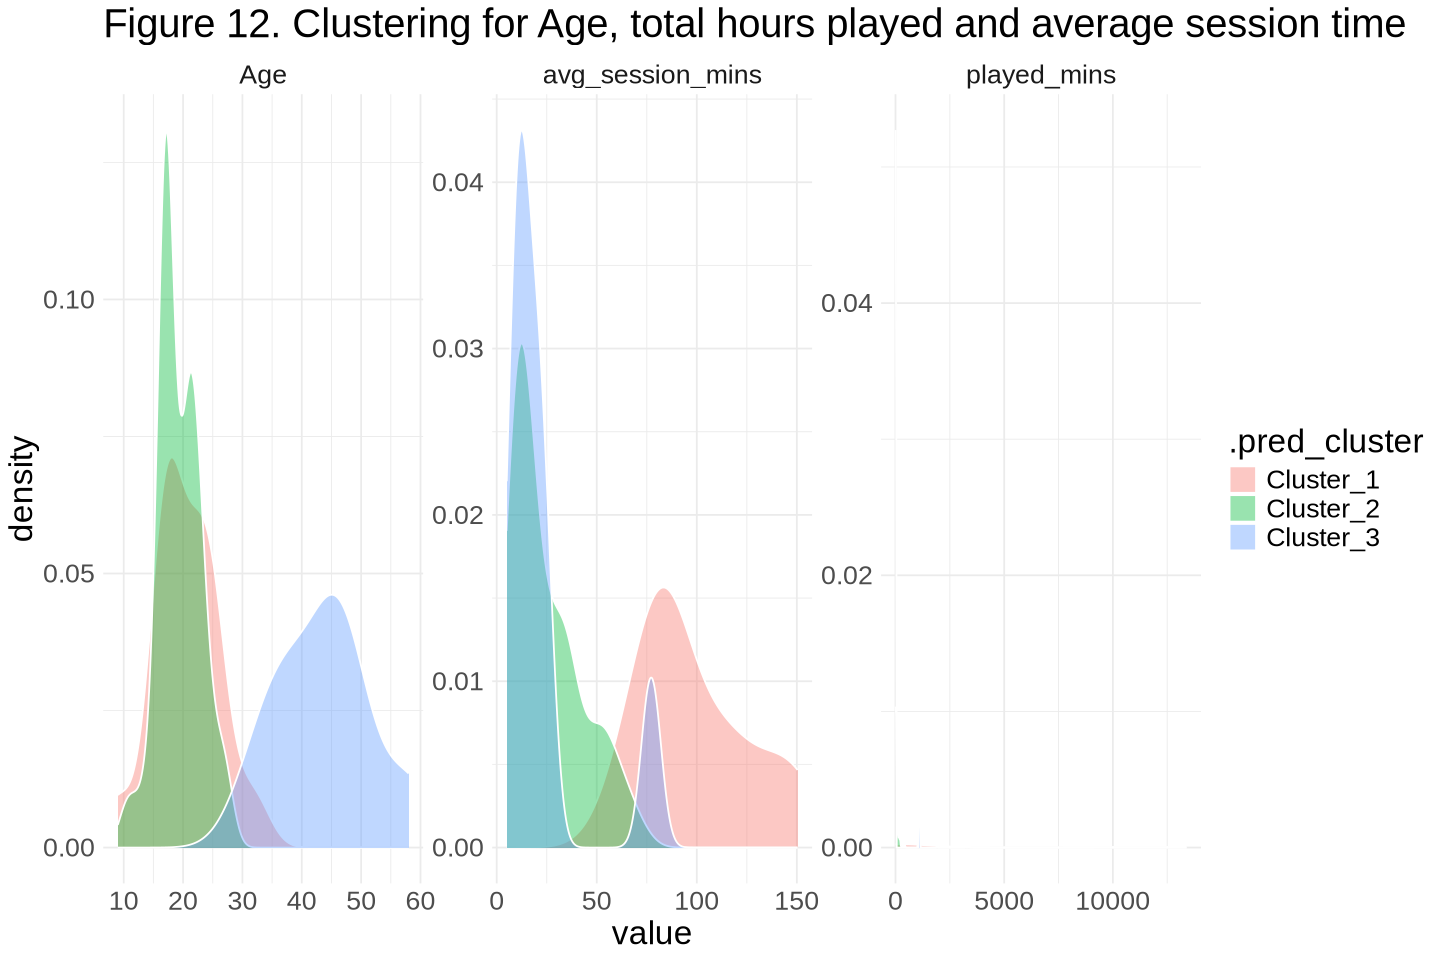

In [8]:
# Set seed for consistent reproduction 
set.seed(888)

#Plot size
options(repr.plot.width = 8, repr.plot.height = 8)

## Tune for best k ##
avg_sesstime <- sessions_players_elapsed |>
    select(name, Age, session_time_elapsed, played_hours) |>
    filter(!is.na(Age), 
           !is.na(session_time_elapsed), 
           !is.na(played_hours),
           !is.nan(played_hours)) |>
    filter(played_hours > 0) |>
    group_by(name) |>
    summarize(avg_session_mins = mean(session_time_elapsed))

ast_clustdata <- left_join(players_data, avg_sesstime, by = "name") |> 
    filter(!is.na(avg_session_mins)) |> 
    mutate(played_mins = played_hours * 60) |>
    select(Age, played_mins, avg_session_mins)

#ast_clustdata

ast_recipe <- recipe(~ ., ast_clustdata) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

ast_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_ast <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec_nstart) |>
    tune_cluster(resamples = apparent(ast_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_ast <- elbow_stats_ast |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10) + theme_bw()

## Clustering with Optimal K ##
ast_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

ast_clustering <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec) |>
    fit(data = ast_clustdata)

clustered_sess <- augment(ast_clustering, ast_clustdata)

clustered_sess_density <- clustered_sess  |>
    pivot_longer(cols = -.pred_cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .pred_cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

elbow_plot_ast + ggtitle("Figure 11. Elbow Plot for Age, total hours played and average session time")

options(repr.plot.width = 12, repr.plot.height = 8)
clustered_sess_density + ggtitle("Figure 12. Clustering for Age, total hours played and average session time")

#### Bootstrapping and Inference for the Mean with 99% Confidence Interval

[1] 21.13918

0.5%    99.5% 
19.82390 22.63523

[1] 5.845918

0.5%     99.5% 
 1.704495 11.819737

[1] 50.85845

0.5%    99.5% 
47.46310 54.42339

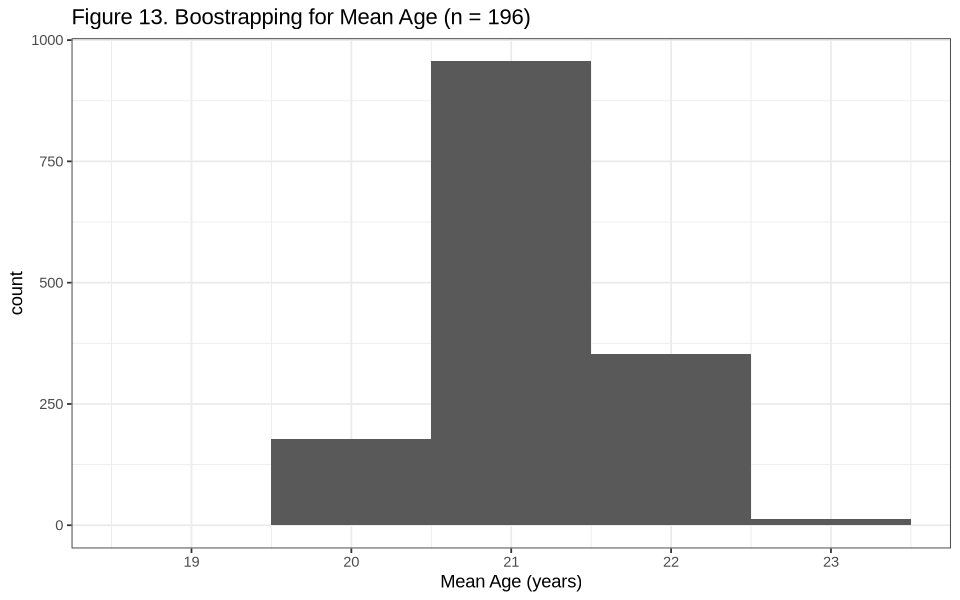

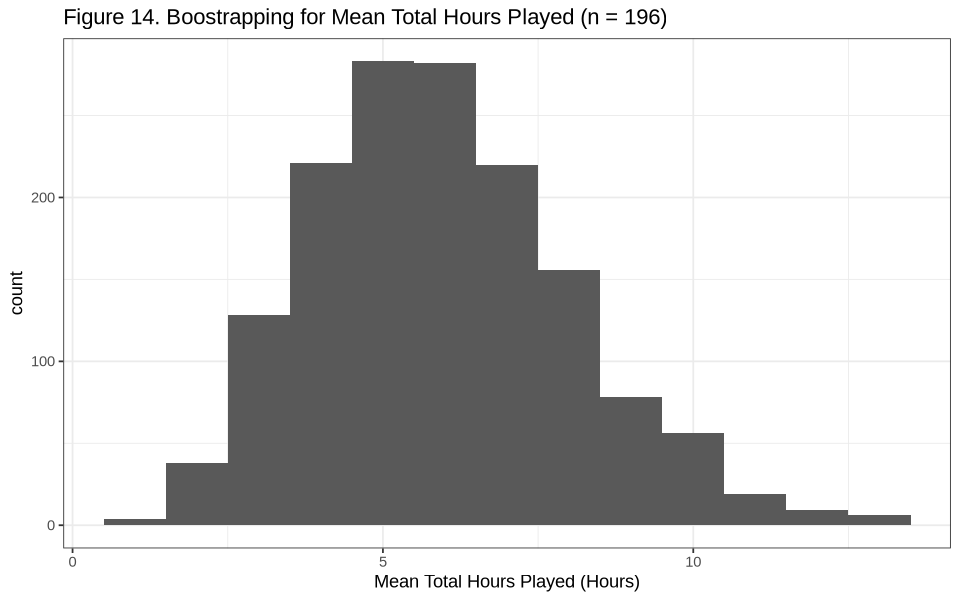

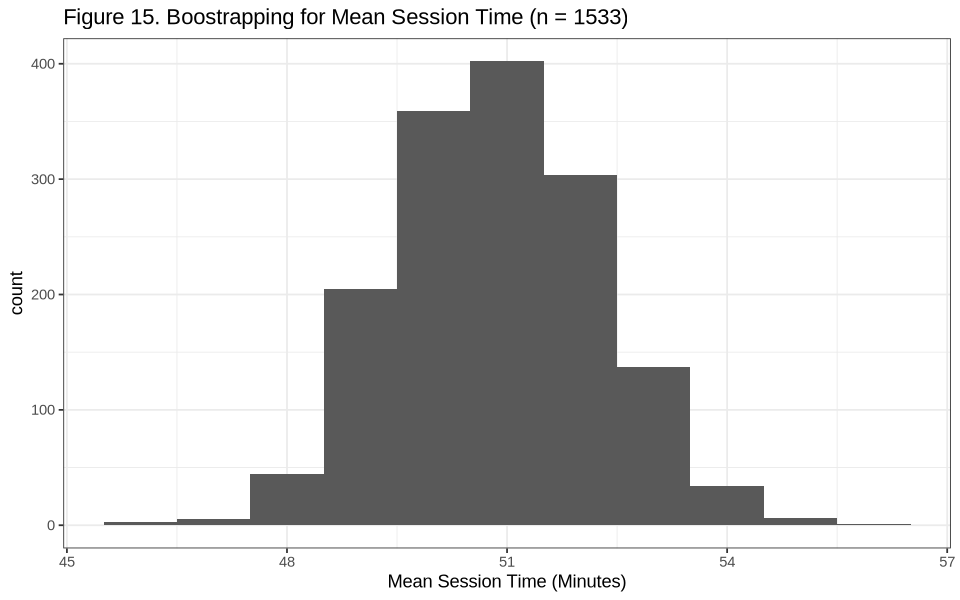

In [9]:
# Set seed for consistent reproduction 
set.seed(888)
options(repr.plot.width = 8, repr.plot.height = 5)

## Age
age_mean <- mean(players_data$Age, na.rm = TRUE)

ages <- players_data |>
        filter(!is.na(Age))|>
        select(Age)

samples_age <- rep_sample_n(ages, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_age = mean(Age))

age_mean

age_bootplot <- ggplot(samples_age, aes(x = mean_age)) +
    geom_histogram(binwidth = 1) + xlab("Mean Age (years)") +
    ggtitle("Figure 13. Boostrapping for Mean Age (n = 196)") + theme_bw()

samples_age |> 
    select(mean_age) |> 
    pull() |>
    quantile(c(0.005, 0.995))

## Hours Played
played_mean <- mean(players_data$played_hours, na.rm = TRUE)

played_data <- players_data |>
        filter(!is.na(played_hours))|>
        select(played_hours)

samples_played <- rep_sample_n(played_data, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_played_hours = mean(played_hours))

played_mean

played_bootplot <- ggplot(samples_played, aes(x = mean_played_hours)) +
    geom_histogram(binwidth = 1) + xlab("Mean Total Hours Played (Hours)") +
    ggtitle("Figure 14. Boostrapping for Mean Total Hours Played (n = 196)") + theme_bw()

samples_played |> 
    select(mean_played_hours) |> 
    pull() |>
    quantile(c(0.005, 0.995))

## Session Time (Minutes)
sess_mean <- mean(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)

sess_data <- sessions_players_elapsed |>
        filter(!is.na(session_time_elapsed))|>
        select(session_time_elapsed)

samples_sess <- rep_sample_n(sess_data, size = 1533, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_sess_mins = mean(session_time_elapsed))

sess_mean

sess_bootplot <- ggplot(samples_sess, aes(x = mean_sess_mins)) +
    geom_histogram(binwidth = 1) + xlab("Mean Session Time (Minutes)") +
    ggtitle("Figure 15. Boostrapping for Mean Session Time (n = 1533)") + theme_bw()

samples_sess |> 
    select(mean_sess_mins) |> 
    pull() |>
    quantile(c(0.005, 0.995))

age_bootplot
played_bootplot
sess_bootplot

#### kNN Classification for Experience

.metric  .estimator .estimate  
1 accuracy multiclass  0.17500000
2 kap      multiclass -0.08196721

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       1       0        0
  Veteran    0       0       2       3        1
  Amateur    0       6       4       0        3
  Regular    1       3       5       1        2
  Beginner   1       1       2       2        2

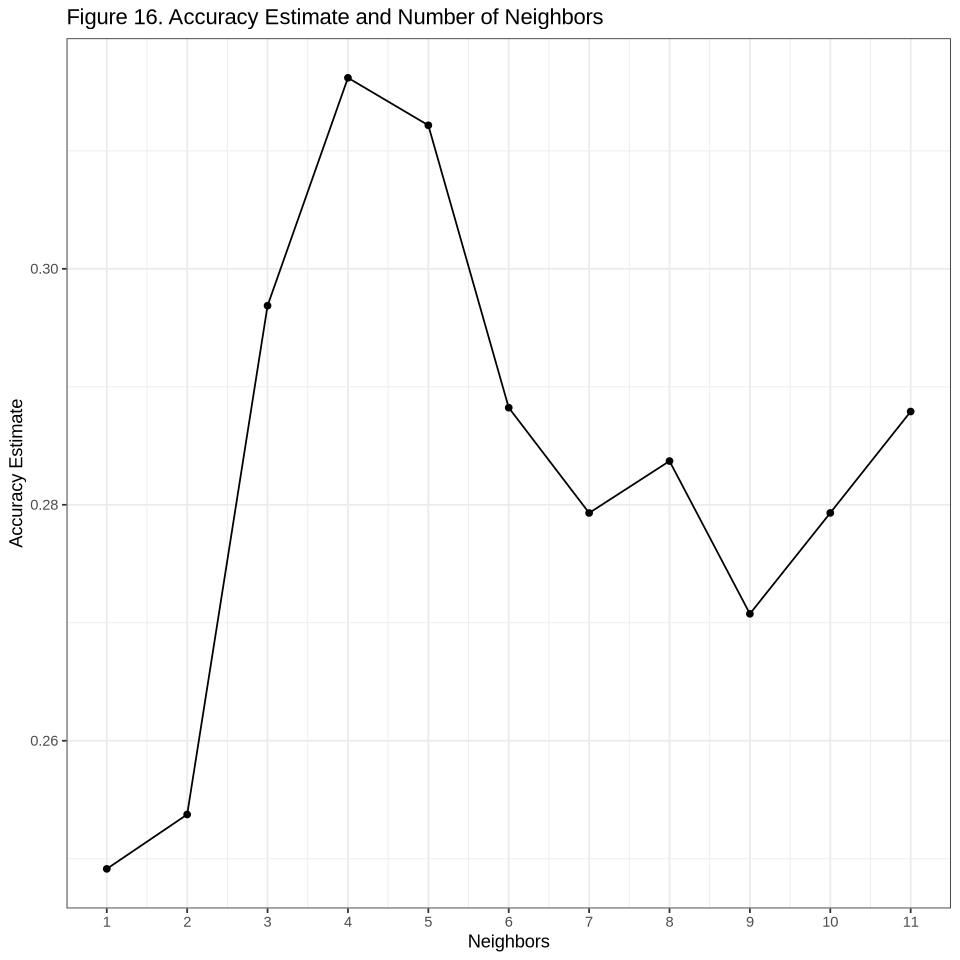

In [10]:
# Set seed for consistent reproduction 
set.seed(888)
options(repr.plot.width = 8, repr.plot.height = 8)

players_data_factored <- players_data |>
                         mutate(experience = as_factor(experience)) |>
                         select(experience, Age, played_hours) |>
                         filter(!is.na(experience), !is.na(Age), !is.na(played_hours))

players_split <- initial_split(players_data_factored, prop = 4/5, strata = experience)
players_training <- training(players_split)
players_testing <- testing(players_split)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_recipe <- recipe(experience ~ Age + played_hours, data = players_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 3, repeats = 3, strata = experience)

knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = players_vfold, grid = tibble(neighbors = seq(1, 11, 1))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  scale_x_continuous(breaks = seq(1, 12, 1)) +
                  ggtitle("Figure 16. Accuracy Estimate and Number of Neighbors") + theme_bw()
cross_val_plot


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
           add_recipe(players_recipe) |>
           add_model(knn_spec) |>
           fit(data = players_training)

player_predictions <- predict(knn_fit, players_testing) |>
                        bind_cols(players_testing)

player_metrics <- player_predictions |> metrics(truth = experience, estimate = .pred_class)

player_conf_mat <- player_predictions |>
                        conf_mat(truth = experience, estimate = .pred_class) 
player_metrics
player_conf_mat

#### Linear Regression for Total Played Minutes Based on Age and Average Session Time

In [11]:
# Set seed for consistent reproduction 
set.seed(1234)

playersess_split <- initial_split(ast_clustdata , prop = 3/4, strata = played_mins)
training_players <- training(playersess_split)
testing_players <- testing(playersess_split)

lm_spec <- linear_reg(mode = "regression", 
                      engine = "lm")

lm_recipe <- recipe(played_mins ~ Age + avg_session_mins, data = training_players)

lm_fit <- workflow() |>
      add_recipe(lm_recipe) |>
      add_model(lm_spec) |>
      fit(training_players)
lm_fit

lm_rmse <- lm_fit |>
        predict(training_players) |>
        bind_cols(training_players) |>
        metrics(truth = played_mins, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()
lm_rmse

player_fit_testing <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(testing_players)

lm_rmspe <- player_fit_testing |>
        predict(testing_players) |>
        bind_cols(testing_players) |>
        metrics(truth = played_mins, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()

lm_rmspe

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               Age  avg_session_mins  
          420.89            -33.43             27.94  


[1] 2337.868

[1] 726.4859

#### kNN Regression for Total Played Minutes Based on Age and Average Session Time

In [13]:
# Set seed for consistent reproduction 
set.seed(888)

## Note: Reusing training and testing set from linear regression

knnreg_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |> 
      set_engine('kknn') |>
      set_mode('regression') 

knnreg_recipe <- recipe(played_mins ~ Age + avg_session_mins, data = training_players) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors()) 

players_reg_vfold <- vfold_cv(training_players, v = 5)

players_reg_workflow <- workflow() |>
    add_recipe(knnreg_recipe) |>
    add_model(knnreg_spec)

neighbors <- seq(1,50,1)
gridvals <- tibble(neighbors)
players_results <- players_reg_workflow |>
  tune_grid(resamples = players_reg_vfold, grid = gridvals) |>
  collect_metrics()

players_min <- players_results |>
   filter(.metric == 'rmse') |>
   slice_min(std_err)

players_min

k_reg_min <- players_min |> pull(neighbors)
knnreg_spec8 <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_reg_min) |> 
      set_engine('kknn') |>
      set_mode('regression') 

players_best_fit <- workflow() |>
         add_recipe(knnreg_recipe) |>
         add_model(knnreg_spec8) |>
         fit(data = training_players)

players_reg_summary <- players_best_fit |>
          predict(testing_players) |>
          bind_cols(testing_players) |>
          metrics(truth = played_mins, estimate = .pred) |>
          filter(.metric == 'rmse') |>
          pull(.estimate) 

players_reg_summary 

neighbors .metric .estimator mean     n std_err  .config              
1 1         rmse    standard   4054.081 5 405.4448 Preprocessor1_Model01

[1] 1250.883